# Ford Gobike Trips Exploration
## by Reem Osama El-Telbani

## Investigation Overview

> In this investigation, i wanted to look at what affects the ride trip's duration from different point of views.

## Dataset Overview

> The dataset contains 183412 rides with 16 attributes about the ride trip like, trip's duration, start_time, end_time, start station, end station. and some informations about the user like, wether the user is a subscriber or a customer, the age of users, and their gender as well. 8,826 datapoints were removed from the analysis because of the missing values or duplications.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # for data visualization
import calendar
from datetime import datetime
from datetime import date

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv("201902-fordgobike-tripdata.csv")

In [3]:
def calculate_age (born_year):
    today = date.today()
    return today.year - born_year 

#drop not important columns
df_unNeeded = ['start_station_id','start_station_name','start_station_latitude','start_station_longitude','end_station_id','end_station_name','end_station_latitude', 'end_station_longitude', 'bike_id', 'bike_share_for_all_trip']
df=df.drop(columns = df_unNeeded)

df = df.dropna()

df["age"]=""
df['age'] = calculate_age(df['member_birth_year'])
#Parsing age datatype to int64 datatype. 
df['age']= df['age'].astype(np.int64)

#Parsing member_birth_year datatype to int64 datatype. 
df['member_birth_year']= df['member_birth_year'].astype(np.int64)

#Parsing start_time object datatype to DateTime datatype. 
df['start_time']= pd.to_datetime(df['start_time'])

#Parsing end_time object datatype to DateTime datatype. 
df['end_time']= pd.to_datetime(df['end_time'])

df['year_of_ride'] =""
df['year_of_ride'] = df['start_time'].apply(lambda x: x.year)

df['month_of_ride'] =""
df['month_of_ride'] = df['start_time'].apply(lambda x: x.month)

## Distribution of Trips Duration

> Trips duration in the dataset distribution are very right skewed. as most of the people tends to not go for a too long rides

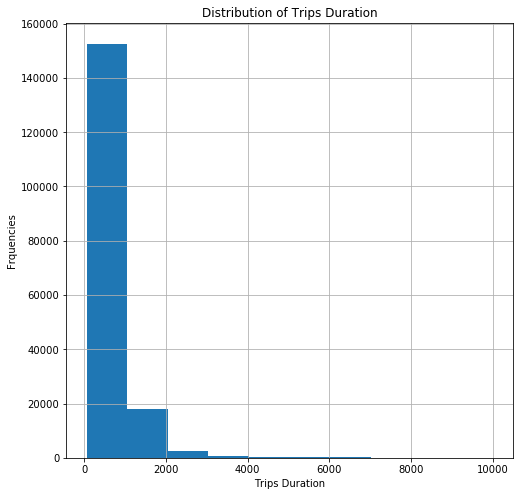

In [4]:
indx_duration=df[df["duration_sec"]>10000].index

'''-------------Dropping Rows that contains outlaiers in duration----------------'''
df.drop(indx_duration , inplace=True)

df["duration_sec"].hist(figsize=(8,8))
plt.title('Distribution of Trips Duration')
plt.xlabel('Trips Duration')
plt.ylabel('Frquencies')
plt.show()

## Distribution of User Ages

> User Ages distributions are right skewed not to much. it showes that people between 20 and 50 ages rides more often than the other ages.

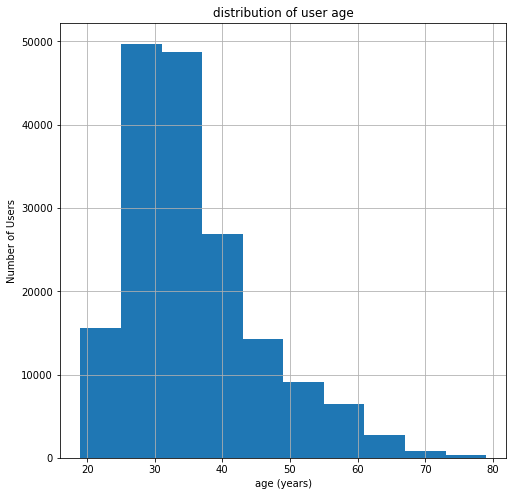

In [5]:
indx_ages=df[df["age"]>80].index
'''-------------Dropping Rows that contains outlaiers in ages----------------'''
df.drop(indx_ages , inplace=True)


df['age'].hist(figsize=(8,8))
plt.title('distribution of user age')
plt.xlabel('age (years)')
plt.ylabel('Number of Users')
plt.show()

## Trips Duration and Age with respect to User Type

> the two user types seems to have the same trends in both the customer and subcribes with respect of age and trips durations. The age of the customers also have small ages than the subscribers ones.

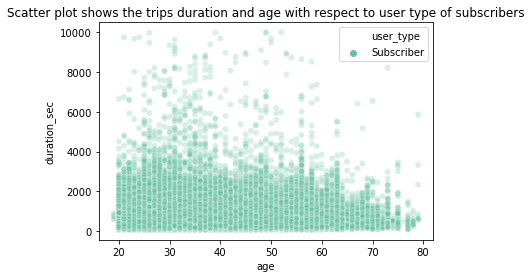

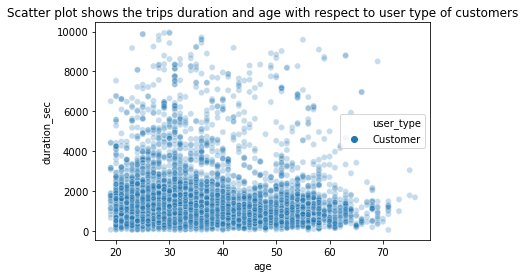

In [6]:
df_sub = df[df["user_type"] == 'Subscriber']
df_cus = df[df["user_type"] == 'Customer']

sns.scatterplot(x='age', y = 'duration_sec', data = df_sub, hue = 'user_type', palette='BuGn', alpha=0.25)
plt.title('Scatter plot shows the trips duration and age with respect to user type of subscribers')
plt.show()
sns.scatterplot(x='age', y = 'duration_sec', data = df_cus, hue = 'user_type', alpha=0.25)
plt.title('Scatter plot shows the trips duration and age with respect to user type of customers')
plt.show()

In [7]:
!jupyter nbconvert Ford_Bike_Exploration_Presentation.ipynb --to slides --post serve --template output_toggle

[NbConvertApp] Converting notebook Ford_Bike_Exploration_Presentation.ipynb to slides
[NbConvertApp] Writing 546785 bytes to Ford_Bike_Exploration_Presentation.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "G:\AnacondaSetup\envs\New_Env\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "G:\AnacondaSetup\envs\New_Env\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "G:\AnacondaSetup\envs\New_Env\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "G:\AnacondaSetup\envs\New_Env\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "G:\AnacondaSetup\envs\New_Env\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
   